Criando base concatenada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from functions import *

Tratamento de colunas KEPLER

In [2]:
kepler = pd.read_csv('./data/kepler/kepler.csv')

kepler_columns = [
    'koi_disposition',
    'ra',
    'dec',
    'koi_steff',
    'koi_srad',
    'koi_prad',
    'koi_teq',
    'koi_slogg',
    'koi_period',
    'koi_depth',
    'koi_insol'
]

kepler_data = kepler[kepler_columns].copy()

kepler_columns_name = {
    'koi_disposition': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'koi_steff' : 'stellar_temperature',
    'koi_srad' : 'stellar_radius',
    'koi_prad' : 'planet_radius',
    'koi_teq' : 'eq_temperature',
    'koi_slogg' : 'stellar_sur_gravity',
    'koi_period' : 'orbital_period',
    'koi_depth' : 'depth',
    'koi_insol' : 'insol_flux'
}

kepler_data.rename(columns=kepler_columns_name, inplace=True)

kepler_data['mission'] = 'kepler'

# Calcular a luminosidade da estrela
luminosidade = calculate_luminosity(kepler_data['stellar_radius'], kepler_data['stellar_temperature'])

# Calcular a distância estelar em parsecs
kepler_data['distance'] = calculate_stellar_distance(luminosidade, kepler_data['insol_flux'])

mapeamento = {'CONFIRMED': 'planet', 'FALSE POSITIVE': 'not planet', 'CANDIDATE': 'candidate'}

kepler_data['classification'] = kepler_data['classification'].replace(mapeamento)

kepler_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,stellar_sur_gravity,orbital_period,depth,insol_flux,mission,distance
0,planet,291.93423,48.141651,5455.0,0.927,2.26,793.0,4.467,9.488036,615.8,93.59,kepler,678.962909
1,planet,291.93423,48.141651,5455.0,0.927,2.83,443.0,4.467,54.418383,874.8,9.11,kepler,2176.213925
2,candidate,297.00482,48.134129,5853.0,0.868,14.60,638.0,4.544,19.899140,10829.0,39.30,kepler,1129.463050
3,not planet,285.53461,48.285210,5805.0,0.791,33.46,1395.0,4.564,1.736952,8079.2,891.96,kepler,212.519983
4,planet,288.75488,48.226200,6031.0,1.046,2.75,1406.0,4.438,2.525592,603.3,926.16,kepler,297.686309


Tratamento de colunas K2

In [3]:
k2 = pd.read_csv('./data/k2/k2.csv')

k2_columns = [
    'disposition',
    'ra',
    'dec',
    'st_teff',
    'st_rad',
    'pl_rade',
    'pl_eqt',
    'sy_dist',
    'st_logg',
    'pl_orbper',
    'pl_insol'
]

k2_data = k2[k2_columns].copy()

k2_columns_name = {
    'disposition': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'st_teff' : 'stellar_temperature',
    'st_rad' : 'stellar_radius',
    'pl_rade' : 'planet_radius',
    'pl_eqt' : 'eq_temperature',
    'sy_dist' : 'distance',
    'st_logg' : 'stellar_sur_gravity',
    'pl_orbper' : 'orbital_period',
    'pl_insol' : 'insol_flux'
}

k2_data.rename(columns=k2_columns_name, inplace=True)

k2_data['mission'] = 'k2'

k2_data['depth'] = transit_depth(k2_data['planet_radius'], k2_data['stellar_radius'])

mapeamento = {'CONFIRMED': 'planet', 'FALSE POSITIVE': 'not planet', 'CANDIDATE': 'candidate'}

k2_data['classification'] = k2_data['classification'].replace(mapeamento)


k2_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,mission,depth
0,planet,53.651123,20.599021,5766.00,1.08,2.578,NaN,179.4610,4.50,41.685500,NaN,k2,5.697946e+06
1,planet,53.651123,20.599021,5766.00,0.93,2.230,546.0,179.4610,4.50,41.685500,NaN,k2,5.749682e+06
2,planet,53.651123,20.599021,5703.00,0.96,2.355,NaN,179.4610,4.38,41.688644,NaN,k2,6.017822e+06
3,candidate,183.846245,-6.268329,4616.52,0.76,1.120,1054.0,97.1795,4.54,2.301830,NaN,k2,2.171745e+06
4,candidate,183.846245,-6.268329,4720.00,0.71,1.313,NaN,97.1795,4.50,2.302368,NaN,k2,3.419895e+06


Tratamento de coluna TESS

In [4]:
tess = pd.read_csv('./data/tess/tess.csv')

tess_columns = [
    'tfopwg_disp',
    'ra',
    'dec',
    'st_teff',
    'st_rad',
    'pl_rade',
    'pl_eqt',
    'st_dist',
    'st_logg',
    'pl_orbper',
    'pl_trandep',
    'pl_insol'
]

tess_data = tess[tess_columns].copy()

tess_columns_name = {
    'tfopwg_disp': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'st_teff' : 'stellar_temperature',
    'st_rad' : 'stellar_radius',
    'pl_rade' : 'planet_radius',
    'pl_eqt' : 'eq_temperature',
    'st_dist' : 'distance',
    'st_logg' : 'stellar_sur_gravity',
    'pl_orbper' : 'orbital_period',
    'pl_trandep' : 'depth',
    'pl_insol' : 'insol_flux'
}

tess_data.rename(columns=tess_columns_name, inplace=True)

tess_data['mission'] = 'tess'

mapeamento = {('PC', 'KP'): 'planet', ('FP', 'FA'): 'not planet', ('CP', 'APC'): 'candidate'}

for chaves, valor in mapeamento.items():
    tess_data['classification'] = tess_data['classification'].replace(to_replace=chaves, value=valor)


tess_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,depth,insol_flux,mission
0,not planet,112.357708,-12.695960,10249.0,2.16986,5.818163,3127.204052,485.735,4.19,2.171348,656.886099,22601.948581,tess
1,planet,122.580465,-5.513852,7070.0,2.01000,11.215400,4045.000000,295.862,4.03,1.931646,1286.000000,44464.500000,tess
2,not planet,104.726966,-10.580455,8924.0,5.73000,23.752900,2037.000000,943.109,NaN,1.867557,1500.000000,2860.610000,tess
3,not planet,110.559945,-25.207017,5388.5,NaN,NaN,1631.000000,7728.170,4.15,2.743230,383.410000,1177.360000,tess
4,not planet,122.178195,-48.802811,9219.0,2.15000,11.311300,4260.000000,356.437,4.14,3.573014,755.000000,54679.300000,tess


Unindo os df

In [5]:
len(k2_data.columns)

13

In [6]:
len(kepler_data.columns)

13

In [7]:
len(tess_data.columns)

13

In [8]:
general_data = pd.concat([k2_data,kepler_data],axis=0)
general_data = pd.concat([general_data,tess_data],axis=0)

Visualizando

In [9]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20364 entries, 0 to 7026
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       20362 non-null  object 
 1   longitude            20364 non-null  float64
 2   latitude             20364 non-null  float64
 3   stellar_temperature  18767 non-null  float64
 4   stellar_radius       19411 non-null  float64
 5   planet_radius        18776 non-null  float64
 6   eq_temperature       16649 non-null  float64
 7   distance             19674 non-null  float64
 8   stellar_sur_gravity  17584 non-null  float64
 9   orbital_period       20225 non-null  float64
 10  insol_flux           16627 non-null  float64
 11  mission              20364 non-null  object 
 12  depth                19203 non-null  float64
dtypes: float64(11), object(2)
memory usage: 2.2+ MB


Tratamento de INFINITOS no DISTANCE

In [10]:
general_data['distance'] = np.where(general_data['distance']==np.inf,np.nan,general_data['distance'])

Tratamento de NULOS

In [11]:
colunas_dados_faltantes = ['stellar_temperature','stellar_radius','planet_radius','eq_temperature','distance','stellar_sur_gravity','orbital_period','insol_flux','depth']

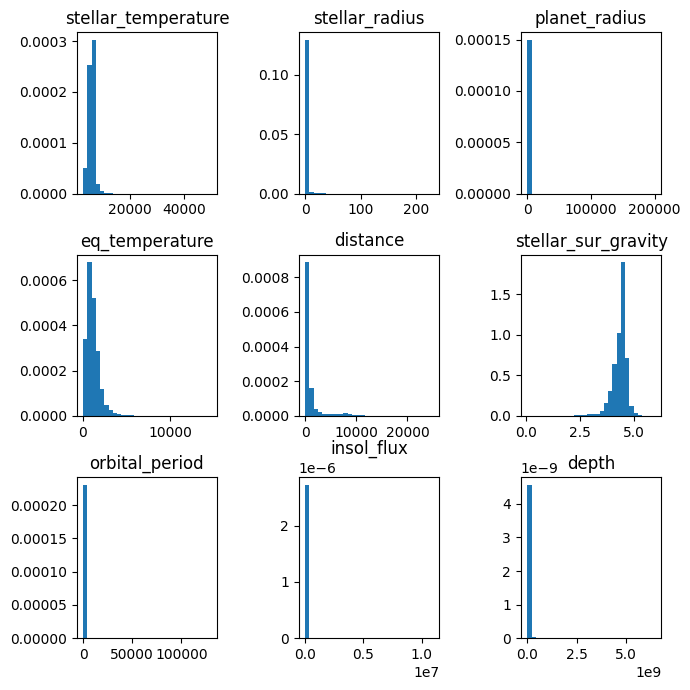

In [12]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)
ax[0,0].hist(general_data.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')

ax[0,1].hist(general_data.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')

ax[0,2].hist(general_data.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')

ax[1,0].hist(general_data.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')

ax[1,1].hist(general_data[general_data.distance!=np.inf].distance,bins = 30,density = True)
ax[1,1].set_title('distance')

ax[1,2].hist(general_data.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')

ax[2,0].hist(general_data.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')

ax[2,1].hist(general_data.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')

ax[2,2].hist(general_data.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

In [13]:
dfx = general_data.copy()
for coluna in colunas_dados_faltantes:
    dfx = imput_random(dfx,coluna)

general_data = dfx.copy()

In [14]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20364 entries, 0 to 7026
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       20362 non-null  object 
 1   longitude            20364 non-null  float64
 2   latitude             20364 non-null  float64
 3   stellar_temperature  20364 non-null  float64
 4   stellar_radius       20364 non-null  float64
 5   planet_radius        20364 non-null  float64
 6   eq_temperature       20364 non-null  float64
 7   distance             20364 non-null  float64
 8   stellar_sur_gravity  20364 non-null  float64
 9   orbital_period       20364 non-null  float64
 10  insol_flux           20364 non-null  float64
 11  mission              20364 non-null  object 
 12  depth                20364 non-null  float64
dtypes: float64(11), object(2)
memory usage: 2.2+ MB


Corrigir ordem das colunas

In [15]:
colunas = ['classification', 'mission', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'insol_flux',
       'depth']

general_data = general_data.reindex(columns=colunas)

Escalonamento com MinMaxScaler() onde a 1a coluna mantida no lugar e as demais escalonadas dentro dos seus próprios limites cada

In [16]:
general_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,k2,53.651123,20.599021,5766.00,1.08,2.578,984.395251,179.4610,4.50,41.685500,629.250296,5.697946e+06
1,planet,k2,53.651123,20.599021,5766.00,0.93,2.230,546.000000,179.4610,4.50,41.685500,110.727962,5.749682e+06
2,planet,k2,53.651123,20.599021,5703.00,0.96,2.355,1305.908817,179.4610,4.38,41.688644,89.356217,6.017822e+06
3,candidate,k2,183.846245,-6.268329,4616.52,0.76,1.120,1054.000000,97.1795,4.54,2.301830,97.199672,2.171745e+06
4,candidate,k2,183.846245,-6.268329,4720.00,0.71,1.313,1378.245604,97.1795,4.50,2.302368,591.956221,3.419895e+06


In [17]:
scaler = MinMaxScaler()

general_scaled = general_data.copy()

cols_to_scale = general_scaled.columns[1:] ## isso define as colunas a escalonar, mas nao tira a coluna categorica mission
col_to_skip = 'mission'
cols_to_scale = cols_to_scale.drop(col_to_skip) ## isso retira a coluna mission da lista de colunas a serem escalonadas

general_scaled[cols_to_scale] = scaler.fit_transform(general_scaled[cols_to_scale].values) ## isso escalona as colunas a serem escalonadas

general_scaled_data = pd.DataFrame(general_scaled, columns=general_scaled.columns)
general_scaled_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,k2,0.148858,0.616440,0.068366,0.004225,0.000012,0.065524,0.007061,0.753004,0.000319,0.000057,0.000882
1,planet,k2,0.148858,0.616440,0.068366,0.003573,0.000011,0.035583,0.007061,0.753004,0.000319,0.000010,0.000890
2,planet,k2,0.148858,0.616440,0.067039,0.003703,0.000011,0.087482,0.007061,0.732712,0.000320,0.000008,0.000932
3,candidate,k2,0.510664,0.465972,0.044156,0.002833,0.000005,0.070277,0.003761,0.759768,0.000017,0.000009,0.000336
4,candidate,k2,0.510664,0.465972,0.046335,0.002615,0.000006,0.092422,0.003761,0.753004,0.000017,0.000054,0.000530


In [18]:
general_scaled_data.to_pickle('data\\general\\general_data_treated.pkl')